In [5]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
exchanges = {
    'binance':
        {
            'bitcoin':'BTC',
            'ethereum':'ETH',
            'litecoin':'LTC',
            'solana':'SOL',
            'ripple':'XRP',
            'dollar':'USDT',
        },
    'coinbase':
        {
            'bitcoin':'BTC',
            'ethereum':'ETH',
            'litecoin':'LTC',
            'solana':'SOL',
            #'ripple':'xrp',
            'dollar':'USD',
        }, 
    'ftx':
        {
            'bitcoin':'BTC',
            'ethereum':'ETH',
            'litecoin':'LTC',
            'solana':'SOL',
            'ripple':'XRP',
            'dollar':'USD',
        }, 
    'bitmex':
        {
            'bitcoin':'XBT',
            'ethereum':'ETH',
            'litecoin':'LTC',
            'solana':'SOL',
            'ripple':'XRP',
            'dollar':'USD',
        },
    'kraken':
        {
            'bitcoin':'XBT',
            'ethereum':'ETH',
            'litecoin':'LTC',
            'solana':'SOL',
            'ripple':'XRP',
            'dollar':'USD',
        },
    }

In [7]:
days = 6
date = datetime.datetime(2022, 2, 28)
dates = [(date + datetime.timedelta(days=x)).strftime('%Y-%m-%d') for x in range(days)]

In [8]:
exch = 'binance'
asset = 'ethereum'


# concatenate all date over the 6 day period into single dataframe resampled by frequency
ob_fq = pd.DataFrame()
for date_str in dates:
    try:
        path = 'tardis_raw.nosync/'+exch+'/'+exch+'_book_snapshot_5_'+date_str+'_'+exchanges[exch][asset]+exchanges[exch]['dollar']+'.csv.gz'
        ob = pd.read_csv(path, compression='gzip')
    except Exception as e:
        print(e)
        path = 'tardis_raw.nosync/'+exch+'/'+exch+'_book_snapshot_5_'+date_str+'_'+exchanges[exch][asset]+'USDT'+'.csv.gz'
        ob = pd.read_csv(path, compression='gzip')
        pass
    ob.sort_values(by='timestamp')
    ob['datetime'] = pd.to_datetime(ob['timestamp'], unit='us')
    ob_fq=pd.concat([ob_fq, ob], ignore_index=True)

In [9]:
ob_fq['mid_price'] = (ob_fq['asks[0].price'] + ob_fq['bids[0].price'])/2

## We rebuild the order book

In order to better picture the order book, we must compute the cumulated volumes

In [15]:
# Creating the cumulated volumes array
order_book = np.zeros((ob_fq.shape[0], 13))
order_book[:,5] = ob_fq['bids[0].amount']
order_book[:,7] = ob_fq['asks[0].amount']
for k in range(1,5):
    order_book[:,5-k] = ob_fq['bids['+str(k)+'].amount'] + order_book[:,5-k+1]
    order_book[:,7+k] = ob_fq['asks['+str(k)+'].amount'] + order_book[:,7+k-1]

order_book[:,6] = 0
# order_book[:,7] = 0
order_book[:,0] = order_book[:,1]
order_book[:,-1] = order_book[:,-2]

In [16]:
# Creating the array of prices
order_book_price = np.zeros((ob_fq.shape[0], 13))
order_book_price[:,5] = ob_fq['bids[0].price']
order_book_price[:,7] = ob_fq['asks[0].price']
for k in range(1,5):
    order_book_price[:,5-k] = ob_fq['bids['+str(k)+'].price']
    order_book_price[:,7+k] = ob_fq['asks['+str(k)+'].price']

order_book_price[:,6] = (order_book_price[:,7]+order_book_price[:,5])/2
# order_book_price[:,7] = order_book_price[:,8]
order_book_price[:,0] = order_book_price[:,1] * 0.999995
order_book_price[:,-1] = order_book_price[:,-2] * 1.00001

In [13]:
print(order_book[0,:])

[ 7.4902  7.4902  7.4377  5.3376  4.4882  3.7203  0.      0.     18.1477
 21.9682 25.7886 29.2949 32.6949 32.6949]


In [14]:
print(order_book_price[0,:])

[2616.3669181 2616.38      2616.51      2616.53      2616.58
 2616.79      2616.795     2616.8       2616.8       2616.96
 2617.08      2617.11      2617.12      2617.1461712]


## Analysing an interesting event in the order book:

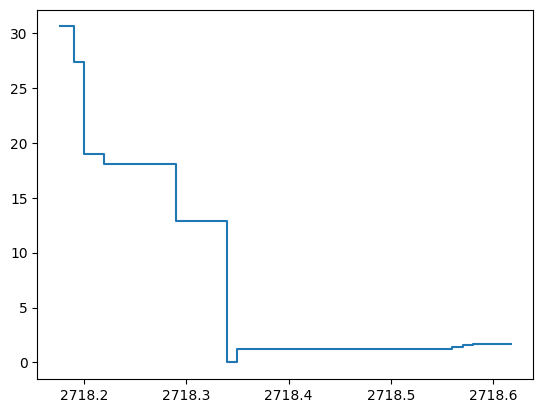

In [9]:
plt.step(order_book_price[2918496,:],order_book[2918496,:])
plt.ticklabel_format(useOffset=False)    
plt.show()

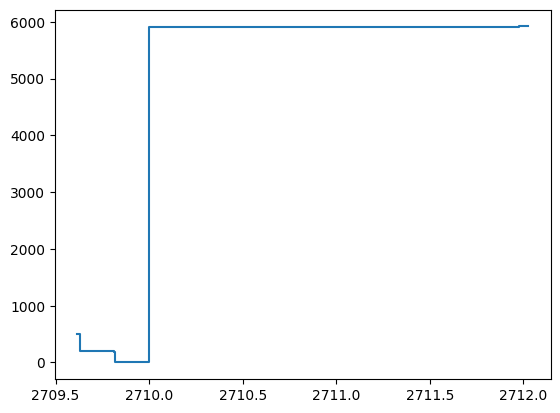

In [10]:
plt.step(order_book_price[2918497,:],order_book[2918497,:])
plt.show()

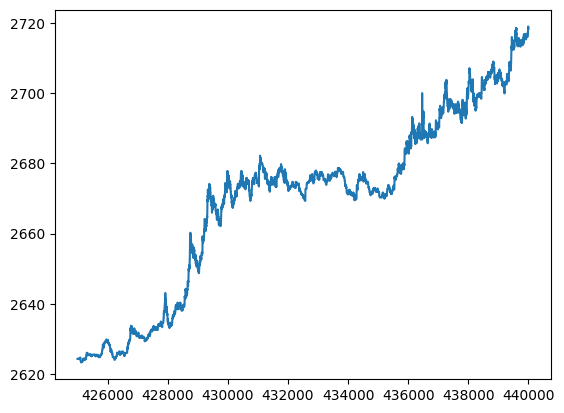

In [11]:
plt.plot(ob_fq['mid_price'].iloc[425000:440000])
plt.show()

## Example of Order Book evolution at the beginning

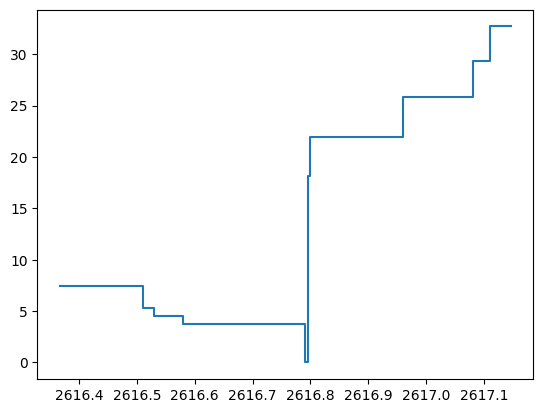

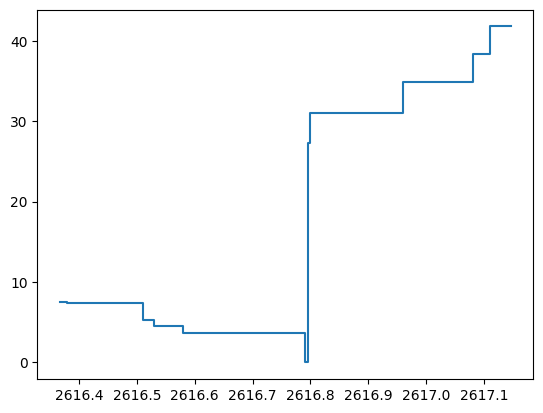

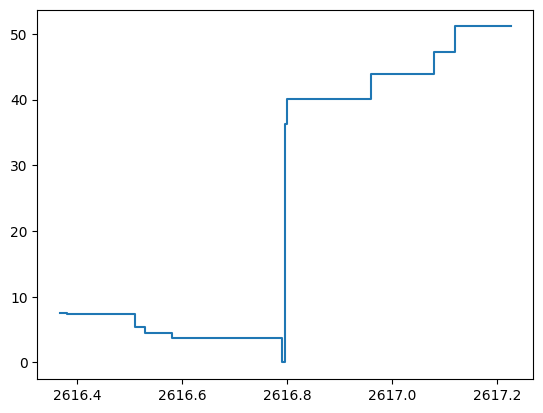

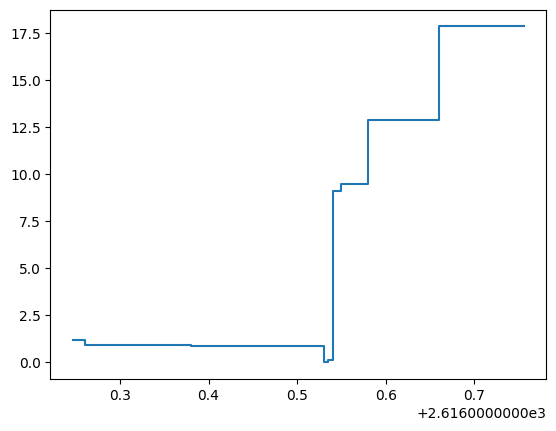

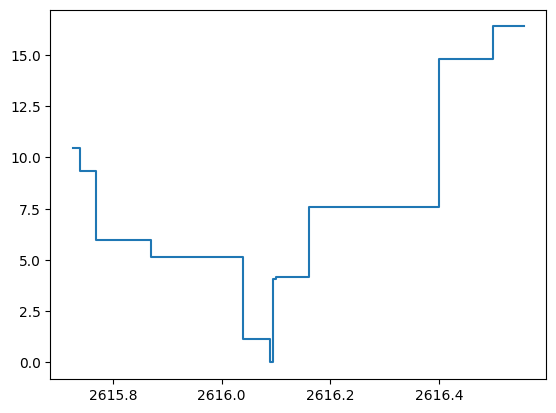

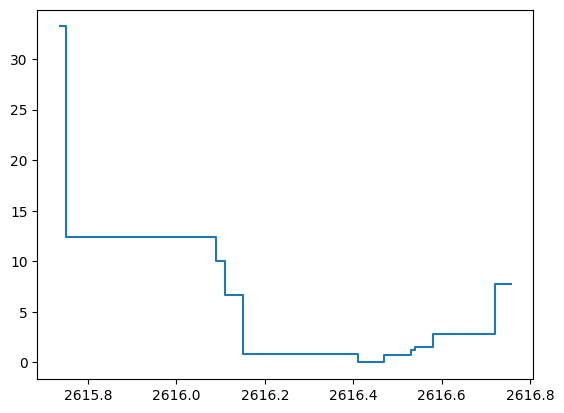

In [17]:
for i in range(6):
    plt.step(order_book_price[i,:],order_book[i,:])
    plt.show()

In [14]:
print(order_book_price[5,6]-order_book_price[4,6])

0.375


In [15]:
print(ob_fq.iloc[0,:])

exchange                              binance
symbol                                ETHUSDT
timestamp                    1646006401975576
local_timestamp              1646006401975576
asks[0].price                          2616.8
asks[0].amount                        18.1477
bids[0].price                         2616.79
bids[0].amount                         3.7203
asks[1].price                         2616.96
asks[1].amount                         3.8205
bids[1].price                         2616.58
bids[1].amount                         0.7679
asks[2].price                         2617.08
asks[2].amount                         3.8204
bids[2].price                         2616.53
bids[2].amount                         0.8494
asks[3].price                         2617.11
asks[3].amount                         3.5063
bids[3].price                         2616.51
bids[3].amount                         2.1001
asks[4].price                         2617.12
asks[4].amount                    

In [16]:
print(ob_fq.iloc[2918496,:])

exchange                              binance
symbol                                ETHUSDT
timestamp                    1646356153184000
local_timestamp              1646356153190433
asks[0].price                         2718.35
asks[0].amount                         0.3845
bids[0].price                         2718.34
bids[0].amount                        12.8547
asks[1].price                         2718.56
asks[1].amount                          0.809
bids[1].price                         2718.29
bids[1].amount                           5.23
asks[2].price                         2718.57
asks[2].amount                          0.182
bids[2].price                         2718.22
bids[2].amount                         0.8872
asks[3].price                         2718.58
asks[3].amount                         0.1972
bids[3].price                          2718.2
bids[3].amount                         8.3921
asks[4].price                         2718.59
asks[4].amount                    

In [17]:
print(ob_fq.iloc[5,:])

exchange                              binance
symbol                                ETHUSDT
timestamp                    1646006402372000
local_timestamp              1646006402379048
asks[0].price                         2616.53
asks[0].amount                         0.7384
bids[0].price                         2616.41
bids[0].amount                         0.8264
asks[1].price                         2616.54
asks[1].amount                         0.4705
bids[1].price                         2616.15
bids[1].amount                            5.8
asks[2].price                         2616.58
asks[2].amount                          0.335
bids[2].price                         2616.11
bids[2].amount                            3.4
asks[3].price                         2616.72
asks[3].amount                         1.2505
bids[3].price                         2616.09
bids[3].amount                            2.4
asks[4].price                         2616.73
asks[4].amount                    